In [20]:
%matplotlib inline

In [21]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('ggplot')

In [98]:
import seaborn as sns
import nltk

In [2]:
df_indian = pd.read_csv('/Users/jralston/git_proj/Scrapy_project_yelp/yelp/yelp_indian.csv')

In [4]:
df_thai = pd.read_csv('/Users/jralston/git_proj/Scrapy_project_yelp/yelp/yelp_thai.csv')

In [6]:
df_indian.shape

(54566, 6)

In [7]:
df_thai.shape

(98358, 6)

In [8]:
df = df_indian

In [13]:
df.head()

,address,date,price,rating,restaurant,text
0,"27 W 24th St, New York, NY 10010",7/6/2012,$$$,4,Junoon,Very pleased with my gdine purchase and great ...
1,"27 W 24th St, New York, NY 10010",1/6/2012,$$$,5,Junoon,so.....amazing!! this is the best indian food...
2,"27 W 24th St, New York, NY 10010",2/13/2012,$$$,2,Junoon,We went to Junoon expecting a Michelin starred...
3,"320 Park Ave, New York, NY 10020",7/14/2011,$$,1,Just Salad,This place is so cheap with the toppings! The...
4,"320 Park Ave, New York, NY 10020",3/19/2014,$$,2,Just Salad,I love the salads here. The quality of product...


In [27]:
df.columns.to_series().groupby(df.dtypes).groups

{dtype('int64'): Index(['rating'], dtype='object'),
 dtype('O'): Index(['address', 'date', 'price', 'restaurant', 'text'], dtype='object')}

In [38]:
df.groupby(['restaurant', 'address']).agg({'text': ['count'], 'rating': ['mean', 'std']}).\
sort_values(('text', 'count'), ascending = False).head()

text    rating  \
                                                        count      mean   
restaurant        address                                                 
The Halal Guys    W 53rd St 6th Ave, New York, NY 10019  8731  4.256901   
Friedman’s        132 W 31st St, New York, NY 10001      1675  3.983881   
Red Bamboo        140 W 4th St, New York, NY 10012       1517  4.057350   
Thai Villa        5 E 19th St, New York, NY 10003        1478  4.340325   
Taim West Village 222 Waverly Pl, New York, NY 10014     1404  4.407407   

                                                                   
                                                              std  
restaurant        address                                          
The Halal Guys    W 53rd St 6th Ave, New York, NY 10019  1.061822  
Friedman’s        132 W 31st St, New York, NY 10001      1.106234  
Red Bamboo        140 W 4th St, New York, NY 10012       1.069489  
Thai Villa        5 E 19th St, New York, NY 10003        0.935936  
Taim West Village 222 Waverly Pl, New York, NY 10014     0.879384

In [79]:
df_agg = df.groupby(['restaurant', 'address', 'price']).agg({'text': ['count'], 'rating': ['mean', 'std']}).\
sort_values(('text', 'count'), ascending = False)

In [80]:
df_agg.head()

text    rating  \
                                                              count      mean   
restaurant        address                               price                   
The Halal Guys    W 53rd St 6th Ave, New York, NY 10019 $      8731  4.256901   
Friedman’s        132 W 31st St, New York, NY 10001     $$     1675  3.983881   
Red Bamboo        140 W 4th St, New York, NY 10012      $$     1517  4.057350   
Thai Villa        5 E 19th St, New York, NY 10003       $$     1478  4.340325   
Taim West Village 222 Waverly Pl, New York, NY 10014    $      1404  4.407407   

                                                                         
                                                                    std  
restaurant        address                               price            
The Halal Guys    W 53rd St 6th Ave, New York, NY 10019 $      1.061822  
Friedman’s        132 W 31st St, New York, NY 10001     $$     1.106234  
Red Bamboo        140 W 4th St, New York, NY 10012      $$     1.069489  
Thai Villa        5 E 19th St, New York, NY 10003       $$     0.935936  
Taim West Village 222 Waverly Pl, New York, NY 10014    $      0.879384

(array([11., 10., 13., 18., 14.,  6., 13.,  9., 32., 26.]),
 array([  0. ,  12.5,  25. ,  37.5,  50. ,  62.5,  75. ,  87.5, 100. ,
        112.5, 125. ]),
 <a list of 10 Patch objects>)

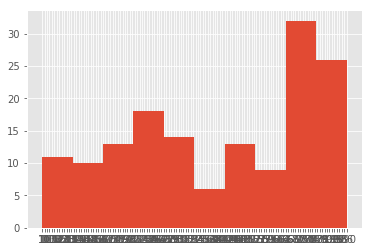

In [81]:
plt.hist(df_agg[[('text', 'count')]])

In [1]:
plt.hist(df_agg[[('text', 'count')]], bins=10)

NameError: name 'plt' is not defined

(array([36., 32., 31., 37., 36.]),
 array([  0. ,  30.2,  60.4,  90.6, 120.8, 151. ]),
 <a list of 5 Patch objects>)

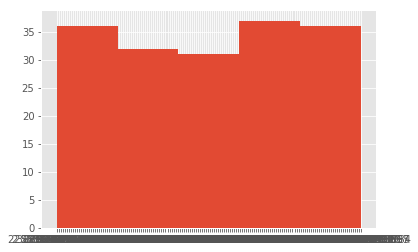

In [83]:
plt.hist(df_counts[[('rating', 'mean')]], bins = 5)

(array([ 3609.,  3789.,  7103., 16629., 23436.]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. ]),
 <a list of 5 Patch objects>)

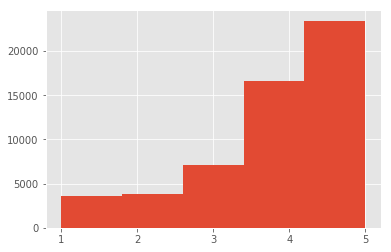

In [84]:
plt.hist(df[['rating']], bins = 5)

In [87]:
df[['restaurant', 'address']].drop_duplicates().shape

(172, 2)

In [88]:
df[['restaurant']].drop_duplicates().shape

(159, 1)

In [89]:
df.loc[df.price=='$$$$',:].groupby(['restaurant', 'address']).agg({'text': ['count'], 'rating': ['mean', 'std']}).\
sort_values(('text', 'count'), ascending = False)

text    rating          
                                                count      mean       std
restaurant    address                                                    
Indian Accent 123 W 56th St, New York, NY 10019   356  4.280899  1.125767

In [90]:
df.loc[df.price=='$$$',:].groupby(['restaurant', 'address']).agg({'text': ['count'], 'rating': ['mean', 'std']}).\
sort_values(('text', 'count'), ascending = False)

text  \
                                                                         count   
restaurant                         address                                       
Fig & Olive                        420 W 13th St, New York, NY 10014      1213   
Junoon                             27 W 24th St, New York, NY 10010       1183   
Fig & Olive Fifth Ave              10 E 52nd St, New York, NY 10022        990   
Hangawi                            12 E 32nd St, New York, NY 10016        986   
Blossom                            187 9th Ave, New York, NY 10011         900   
Vatan Indian Vegetarian            409 3rd Ave, New York, NY 10016         515   
Amma                               246 E 51st St, New York, NY 10022       445   
Nix                                72 University Pl, New York, NY 10003    335   
ABCV                               38 E 19th St, New York, NY 10003        224   
Rahi                               60 Greenwich Ave, New York, NY 10011    187   
aRoqa                              206 9th Ave, New York, NY 10011         131   
Juice Press                        122 Greenwich Ave, New York, NY 10014    60   
Malika Exclusive Indian Restaurant 210 E 43rd St, New York, NY 10017         2   

                                                                            rating  \
                                                                              mean   
restaurant                         address                                           
Fig & Olive                        420 W 13th St, New York, NY 10014      3.684254   
Junoon                             27 W 24th St, New York, NY 10010       3.648352   
Fig & Olive Fifth Ave              10 E 52nd St, New York, NY 10022       3.564646   
Hangawi                            12 E 32nd St, New York, NY 10016       4.066937   
Blossom                            187 9th Ave, New York, NY 10011        4.210000   
Vatan Indian Vegetarian            409 3rd Ave, New York, NY 10016        3.945631   
Amma                               246 E 51st St, New York, NY 10022      3.766292   
Nix                                72 University Pl, New York, NY 10003   4.050746   
ABCV                               38 E 19th St, New York, NY 10003       3.933036   
Rahi                               60 Greenwich Ave, New York, NY 10011   4.566845   
aRoqa                              206 9th Ave, New York, NY 10011        4.000000   
Juice Press                        122 Greenwich Ave, New York, NY 10014  2.800000   
Malika Exclusive Indian Restaurant 210 E 43rd St, New York, NY 10017      2.500000   

                                                                                    
                                                                               std  
restaurant                         address                                          
Fig & Olive                        420 W 13th St, New York, NY 10014      1.131629  
Junoon                             27 W 24th St, New York, NY 10010       1.305239  
Fig & Olive Fifth Ave              10 E 52nd St, New York, NY 10022       1.169793  
Hangawi                            12 E 32nd St, New York, NY 10016       1.075610  
Blossom                            187 9th Ave, New York, NY 10011        1.089596  
Vatan Indian Vegetarian            409 3rd Ave, New York, NY 10016        1.264971  
Amma                               246 E 51st St, New York, NY 10022      1.269616  
Nix                                72 University Pl, New York, NY 10003   1.099996  
ABCV                               38 E 19th St, New York, NY 10003       1.212779  
Rahi                               60 Greenwich Ave, New York, NY 10011   0.842150  
aRoqa                              206 9th Ave, New York, NY 10011        1.430438  
Juice Press                        122 Greenwich Ave, New York, NY 10014  1.644714  
Malika Exclusive Indian Restaurant 210 E 43rd St, New York, NY 10017      0.707107

In [94]:
df.loc[df.price=='$$$$',:].groupby(['restaurant', 'address']).agg({'text': ['count'], 'rating': ['mean', 'std']}).\
sort_values(('text', 'count'), ascending = False).shape

(1, 3)

In [93]:
df.loc[df.price=='$$$',:].groupby(['restaurant', 'address']).agg({'text': ['count'], 'rating': ['mean', 'std']}).\
sort_values(('text', 'count'), ascending = False).shape

(13, 3)

In [92]:
df.loc[df.price=='$$',:].groupby(['restaurant', 'address']).agg({'text': ['count'], 'rating': ['mean', 'std']}).\
sort_values(('text', 'count'), ascending = False).shape

(77, 3)

In [95]:
df.loc[df.price=='$',:].groupby(['restaurant', 'address']).agg({'text': ['count'], 'rating': ['mean', 'std']}).\
sort_values(('text', 'count'), ascending = False).shape

(61, 3)

In [96]:
df.apply(lambda x: x.count(), axis=0)

address       54566
date          54566
price         54378
rating        54566
restaurant    54566
text          54566
dtype: int64

In [103]:
sample_text = df['text'][50]

In [104]:
sample_text

"Roast is one of my favorite restaurants in the area. I both order and go into the restaurant frequently as I work in the area. It's always great food and the service is very quick/efficient. Would definitely recommend Roast."

In [110]:
from textblob import TextBlob

In [111]:
review = TextBlob(sample_text)

In [112]:
review.sentiment

Sentiment(polarity=0.31999999999999995, subjectivity=0.57)

In [113]:
df.head()

,address,date,price,rating,restaurant,text
0,"27 W 24th St, New York, NY 10010",7/6/2012,$$$,4,Junoon,Very pleased with my gdine purchase and great ...
1,"27 W 24th St, New York, NY 10010",1/6/2012,$$$,5,Junoon,so.....amazing!! this is the best indian food...
2,"27 W 24th St, New York, NY 10010",2/13/2012,$$$,2,Junoon,We went to Junoon expecting a Michelin starred...
3,"320 Park Ave, New York, NY 10020",7/14/2011,$$,1,Just Salad,This place is so cheap with the toppings! The...
4,"320 Park Ave, New York, NY 10020",3/19/2014,$$,2,Just Salad,I love the salads here. The quality of product...


In [122]:
df.head(1000).text.apply(lambda x: TextBlob(x).sentiment)

0          (0.31229538690476194, 0.6649925595238095)
1                                      (0.6975, 0.7)
2          (0.10147569444444446, 0.5361979166666666)
3        (-0.026136363636363624, 0.5818181818181819)
4          (0.05421568627450981, 0.4637254901960784)
5                          (0.6583333333333333, 0.6)
6         (-0.16666666666666666, 0.5416666666666666)
7         (0.13999999999999999, 0.45999999999999996)
8      (-0.0066666666666666706, 0.32666666666666666)
9          (0.16041666666666668, 0.5354166666666667)
10                      (-0.056249999999999994, 0.7)
11         (0.27152777777777776, 0.6659722222222221)
12        (0.05499999999999999, 0.38769230769230767)
13        (0.05892857142857143, 0.46428571428571436)
14                      (0.36250000000000004, 0.505)
15                       (0.14500000000000002, 0.53)
16         (0.21241314674908424, 0.5833173076923077)
17         (0.18725895316804408, 0.5214187327823692)
18         (0.08974358974358972, 0.48717948717

In [123]:
df_sentiment = df

In [124]:
df['sentiment'] = df.text.apply(lambda x: TextBlob(x).sentiment)

In [150]:
df.head()

,address,date,price,rating,restaurant,text,sentiment,polarity,subjectivity
0,"27 W 24th St, New York, NY 10010",7/6/2012,$$$,4,Junoon,Very pleased with my gdine purchase and great ...,"(0.31229538690476194, 0.6649925595238095)",0.312295,0.664993
1,"27 W 24th St, New York, NY 10010",1/6/2012,$$$,5,Junoon,so.....amazing!! this is the best indian food...,"(0.6975, 0.7)",0.697500,0.700000
2,"27 W 24th St, New York, NY 10010",2/13/2012,$$$,2,Junoon,We went to Junoon expecting a Michelin starred...,"(0.10147569444444446, 0.5361979166666666)",0.101476,0.536198
3,"320 Park Ave, New York, NY 10020",7/14/2011,$$,1,Just Salad,This place is so cheap with the toppings! The...,"(-0.026136363636363624, 0.5818181818181819)",-0.026136,0.581818
4,"320 Park Ave, New York, NY 10020",3/19/2014,$$,2,Just Salad,I love the salads here. The quality of product...,"(0.05421568627450981, 0.4637254901960784)",0.054216,0.463725


In [138]:
df.sentiment[0]

Sentiment(polarity=0.31229538690476194, subjectivity=0.6649925595238095)

In [139]:
df['polarity'] = df.sentiment.apply(lambda x: x[0])

In [144]:
df['subjectivity'] = df.sentiment.apply(lambda x: x[1])

In [137]:
df.sentiment[40000]

Sentiment(polarity=0.43151136363636367, subjectivity=0.5406666666666666)

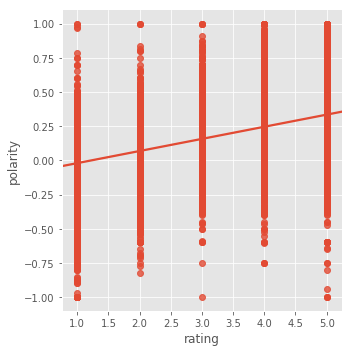

In [140]:
sns.lmplot("rating", "polarity", df)

(array([ 3609.,     0.,  3789.,     0.,     0.,  7103.,     0., 16629.,
            0., 23436.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

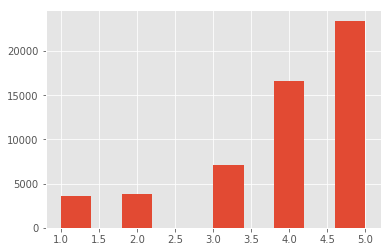

In [142]:
plt.hist(df.rating)

(array([   32.,    70.,   237.,   939.,  4353., 17388., 20352.,  8460.,
         2132.,   603.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <a list of 10 Patch objects>)

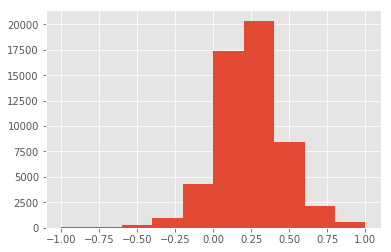

In [143]:
plt.hist(df.polarity)

(array([  205.,   132.,   577.,  2303.,  8830., 18522., 15040.,  6385.,
         1868.,   704.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

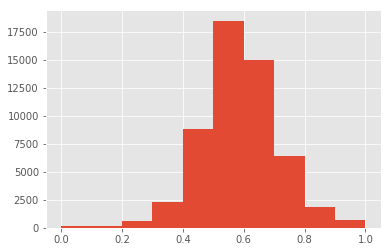

In [145]:
plt.hist(df.subjectivity)

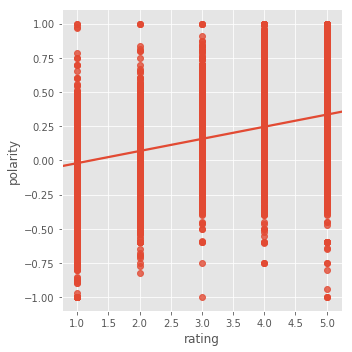

In [146]:
sns.lmplot("rating", "polarity", df)

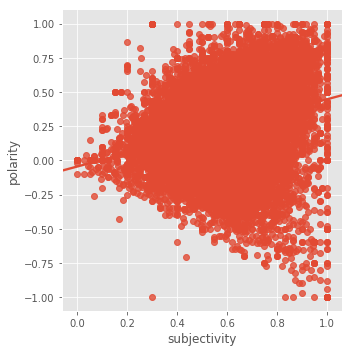

In [147]:
sns.lmplot("subjectivity", "polarity", df)

In [148]:
df.head()

,address,date,price,rating,restaurant,text,sentiment,polarity,subjectivity
0,"27 W 24th St, New York, NY 10010",7/6/2012,$$$,4,Junoon,Very pleased with my gdine purchase and great ...,"(0.31229538690476194, 0.6649925595238095)",0.312295,0.664993
1,"27 W 24th St, New York, NY 10010",1/6/2012,$$$,5,Junoon,so.....amazing!! this is the best indian food...,"(0.6975, 0.7)",0.697500,0.700000
2,"27 W 24th St, New York, NY 10010",2/13/2012,$$$,2,Junoon,We went to Junoon expecting a Michelin starred...,"(0.10147569444444446, 0.5361979166666666)",0.101476,0.536198
3,"320 Park Ave, New York, NY 10020",7/14/2011,$$,1,Just Salad,This place is so cheap with the toppings! The...,"(-0.026136363636363624, 0.5818181818181819)",-0.026136,0.581818
4,"320 Park Ave, New York, NY 10020",3/19/2014,$$,2,Just Salad,I love the salads here. The quality of product...,"(0.05421568627450981, 0.4637254901960784)",0.054216,0.463725


In [149]:
import gensim

ModuleNotFoundError: No module named 'gensim'